<a href="https://colab.research.google.com/github/silvia-jesus/CAR_Labrea/blob/main/CAR_RL_Labrea_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from osgeo import gdal

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import glob
import shutil
import os
from pathlib import Path

In [ ]:
import time

In [ ]:
if not os.path.exists('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES'):
  os.makedirs('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES')

Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
if not os.path.exists('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS'):
  os.makedirs('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS')

Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
value = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/DADOS/code_mapbiomas_legend.csv',sep=';', encoding = 'latin1')
value['value'] = value['value'].astype(str)
value.head()

,name,code,nome,value
0,"Beach, Dune and Sand Spot",#DD7E6B,"Praia, Duna e Areal",23
1,Citrus,#d082de,Citrus,47
2,Coffee,#cca0d4,Café,46
3,Aquaculture,#02106f,Aquicultura,31
4,Forest Formation,#006400,Formação Florestal,3


In [ ]:
val_dict = dict(zip(value.value, value.name))
val_dict

{'23': 'Beach, Dune and Sand Spot',
 '47': 'Citrus',
 '46': 'Coffee',
 '31': 'Aquaculture',
 '3': 'Forest Formation',
 '9': 'Forest Plantation',
 '5': 'Mangrove',
 '12': 'Grassland',
 '30': 'Mining',
 '21': 'Mosaic of Uses',
 '48': 'Other Perennial Crop',
 '13': 'Other non Forest Formations',
 '25': 'Other non Vegetated Areas',
 '41': 'Other temporary Crops',
 '15': 'Pasture',
 '33': 'River Lake and Ocean',
 '32': 'Salt Flat',
 '29': 'Rocky Outcrop',
 '39': 'Soybean',
 '4': 'Savanna Formation',
 '20': 'Sugar Cane',
 '24': 'Urban Area',
 '11': 'Wetland',
 '49': 'Wooded Sandbank Vegetation',
 '50': 'Herbaceous Sandbank Vegetation',
 '40': 'Rice',
 '62': 'Cotton',
 '27': 'Non Observed'}

**LULC - RL**

In [ ]:
lulc_rl = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/Tabelas_LULC/RL_LULC_Labrea.csv')
lulc_rl.head()

,Unnamed: 0,Forest Formation,Pasture,IDF,ano,Grassland,Wetland,River Lake and Ocean,Savanna Formation,Other temporary Crops
0,0,1355.0,346.0,113026,2020,NaN,NaN,NaN,NaN,NaN
1,1,1225.0,476.0,113026,2012,NaN,NaN,NaN,NaN,NaN
2,2,1238.0,463.0,113026,2008,NaN,NaN,NaN,NaN,NaN
3,3,1260.0,441.0,113026,2016,NaN,NaN,NaN,NaN,NaN
4,4,1096.0,2264.0,120896,2008,4.0,NaN,NaN,NaN,NaN


In [ ]:
lulc_rl_fill = lulc_rl.fillna(0)
lulc_rl_fill.head()

,Unnamed: 0,Forest Formation,Pasture,IDF,ano,Grassland,Wetland,River Lake and Ocean,Savanna Formation,Other temporary Crops
0,0,1355.0,346.0,113026,2020,0.0,0.0,0.0,0.0,0.0
1,1,1225.0,476.0,113026,2012,0.0,0.0,0.0,0.0,0.0
2,2,1238.0,463.0,113026,2008,0.0,0.0,0.0,0.0,0.0
3,3,1260.0,441.0,113026,2016,0.0,0.0,0.0,0.0,0.0
4,4,1096.0,2264.0,120896,2008,4.0,0.0,0.0,0.0,0.0


In [ ]:
lulc_rl_fill.columns

Index(['Unnamed: 0', 'Forest Formation', 'Pasture', 'IDF', 'ano', 'Grassland',
       'Wetland', 'River Lake and Ocean', 'Savanna Formation',
       'Other temporary Crops'],
      dtype='object')

In [ ]:
lulc_rl_order = lulc_rl_fill[['IDF', 'ano','Forest Formation', 'Pasture',  'Grassland',
       'Wetland', 'River Lake and Ocean', 'Savanna Formation',
       'Other temporary Crops']]

In [ ]:
lulc_rl_order.columns=['IDF','ano','Forest Formation','Pasture','Wetland','Grassland','Water','Savanna Formation','Other Temporary Crops']

In [ ]:
#
# lulc_names = ['Formação Florestal', 'Pastagem',
#        'Campo Alagado e Área Pantanosa', 'Formação Campestre',
#        'Rio, Lago e Oceano', 'Formação Savânica',
#        'Outras Lavouras Temporárias']

In [ ]:
lulc_names = ['Forest Formation','Pasture','Wetland','Grassland','Water','Savanna Formation','Other Temporary Crops']

In [ ]:
a = 900/10000 #hectares
# a = 900/1000000 #km2

for name in lulc_names:
  lulc_rl_order[name] = lulc_rl_order[name].apply(lambda x: x*a)

lulc_rl_order.head() #tabela com a área calculada a partir do número de pixels por classes de cobertura da terra

<ipython-input-56-96558c2a9bbf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lulc_rl_order[name] = lulc_rl_order[name].apply(lambda x: x*a)


,IDF,ano,Forest Formation,Pasture,Wetland,Grassland,Water,Savanna Formation,Other Temporary Crops
0,113026,2020,121.95,31.14,0.00,0.0,0.0,0.0,0.0
1,113026,2012,110.25,42.84,0.00,0.0,0.0,0.0,0.0
2,113026,2008,111.42,41.67,0.00,0.0,0.0,0.0,0.0
3,113026,2016,113.40,39.69,0.00,0.0,0.0,0.0,0.0
4,120896,2008,98.64,203.76,0.36,0.0,0.0,0.0,0.0


In [ ]:
lulc_rl_order['AREA TOTAL'] = lulc_rl_order[lulc_names].sum(axis=1)
lulc_rl_order.head()

,IDF,ano,Forest Formation,Pasture,Wetland,Grassland,Water,Savanna Formation,Other Temporary Crops,AREA TOTAL
0,113026,2020,121.95,31.14,0.00,0.0,0.0,0.0,0.0,153.09
1,113026,2012,110.25,42.84,0.00,0.0,0.0,0.0,0.0,153.09
2,113026,2008,111.42,41.67,0.00,0.0,0.0,0.0,0.0,153.09
3,113026,2016,113.40,39.69,0.00,0.0,0.0,0.0,0.0,153.09
4,120896,2008,98.64,203.76,0.36,0.0,0.0,0.0,0.0,302.76


In [ ]:
for l in lulc_names:
  lulc_rl_order[f'%_{l}']=lulc_rl_order[l]/lulc_rl_order['AREA TOTAL']*100

In [ ]:
lulc_rl_order.head()

,IDF,ano,Forest Formation,Pasture,Wetland,Grassland,Water,Savanna Formation,Other Temporary Crops,AREA TOTAL,%_Forest Formation,%_Pasture,%_Wetland,%_Grassland,%_Water,%_Savanna Formation,%_Other Temporary Crops
0,113026,2020,121.95,31.14,0.00,0.0,0.0,0.0,0.0,153.09,79.659024,20.340976,0.000000,0.0,0.0,0.0,0.0
1,113026,2012,110.25,42.84,0.00,0.0,0.0,0.0,0.0,153.09,72.016461,27.983539,0.000000,0.0,0.0,0.0,0.0
2,113026,2008,111.42,41.67,0.00,0.0,0.0,0.0,0.0,153.09,72.780717,27.219283,0.000000,0.0,0.0,0.0,0.0
3,113026,2016,113.40,39.69,0.00,0.0,0.0,0.0,0.0,153.09,74.074074,25.925926,0.000000,0.0,0.0,0.0,0.0
4,120896,2008,98.64,203.76,0.36,0.0,0.0,0.0,0.0,302.76,32.580262,67.300832,0.118906,0.0,0.0,0.0,0.0


In [ ]:
lulc_rl_order.columns

Index(['IDF', 'ano', 'Forest Formation', 'Pasture', 'Wetland', 'Grassland',
       'Water', 'Savanna Formation', 'Other Temporary Crops', 'AREA TOTAL',
       '%_Forest Formation', '%_Pasture', '%_Wetland', '%_Grassland',
       '%_Water', '%_Savanna Formation', '%_Other Temporary Crops'],
      dtype='object')

In [ ]:
# lulc_rl_area = lulc_rl_order [['IDF', 'ano','Formação Florestal', 'Pastagem',
#        'Campo Alagado e Área Pantanosa', 'Formação Campestre',
#        'Rio, Lago e Oceano', 'Formação Savânica',
#        'Outras Lavouras Temporárias']]

lulc_rl_area = lulc_rl_order [['IDF', 'ano', 'Forest Formation', 'Pasture', 'Wetland', 'Grassland', 'Water', 'Savanna Formation', 'Other Temporary Crops']]
lulc_rl_area.head()

,IDF,ano,Forest Formation,Pasture,Wetland,Grassland,Water,Savanna Formation,Other Temporary Crops
0,113026,2020,121.95,31.14,0.00,0.0,0.0,0.0,0.0
1,113026,2012,110.25,42.84,0.00,0.0,0.0,0.0,0.0
2,113026,2008,111.42,41.67,0.00,0.0,0.0,0.0,0.0
3,113026,2016,113.40,39.69,0.00,0.0,0.0,0.0,0.0
4,120896,2008,98.64,203.76,0.36,0.0,0.0,0.0,0.0


In [ ]:
# lulc_rl_perc = lulc_rl_order [['IDF', 'ano', '%_Formação Florestal',
#        '%_Pastagem', '%_Campo Alagado e Área Pantanosa',
#        '%_Formação Campestre', '%_Rio, Lago e Oceano', '%_Formação Savânica',
#        '%_Outras Lavouras Temporárias']]

lulc_rl_perc = lulc_rl_order [['IDF','ano','%_Forest Formation', '%_Pasture', '%_Wetland', '%_Grassland',
       '%_Water', '%_Savanna Formation', '%_Other Temporary Crops']]


lulc_rl_perc.head()

,IDF,ano,%_Forest Formation,%_Pasture,%_Wetland,%_Grassland,%_Water,%_Savanna Formation,%_Other Temporary Crops
0,113026,2020,79.659024,20.340976,0.000000,0.0,0.0,0.0,0.0
1,113026,2012,72.016461,27.983539,0.000000,0.0,0.0,0.0,0.0
2,113026,2008,72.780717,27.219283,0.000000,0.0,0.0,0.0,0.0
3,113026,2016,74.074074,25.925926,0.000000,0.0,0.0,0.0,0.0
4,120896,2008,32.580262,67.300832,0.118906,0.0,0.0,0.0,0.0


In [ ]:
string = '%_'
lulc_names_perc = [string + x for x in lulc_names]
lulc_names_perc

['%_Forest Formation',
 '%_Pasture',
 '%_Wetland',
 '%_Grassland',
 '%_Water',
 '%_Savanna Formation',
 '%_Other Temporary Crops']

In [ ]:
lulc_rl_year_mean_area = lulc_rl_area.groupby('ano')[lulc_names].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
lulc_rl_year_mean_area

,ano,Forest Formation,Pasture,Wetland,Grassland,Water,Savanna Formation,Other Temporary Crops
3,2020,518.344773,40.876238,6.973017,0.183336,1.090857,0.253133,0.006042
2,2016,538.735311,20.503857,6.936325,0.209517,1.063007,0.266759,0.012430
1,2012,543.772699,15.620381,6.876252,0.150231,1.055958,0.249797,0.002014
0,2008,547.168028,12.252462,6.840913,0.159703,1.059199,0.246178,0.000976


In [ ]:
lulc_rl_year_mean_perc = lulc_rl_perc.groupby('ano')[lulc_names_perc].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
lulc_rl_year_mean_perc

,ano,%_Forest Formation,%_Pasture,%_Wetland,%_Grassland,%_Water,%_Savanna Formation,%_Other Temporary Crops
3,2020,69.265335,30.350066,0.241088,0.083504,0.039629,0.017362,0.003015
2,2016,82.237281,17.442566,0.237294,0.007473,0.037715,0.033757,0.003913
1,2012,88.963501,10.746394,0.234187,0.004478,0.038095,0.013195,0.000150
0,2008,91.612661,8.111584,0.220299,0.007988,0.035606,0.011818,0.000044


In [ ]:
code = []
for i in lulc_names:
    c = value.loc[value['name'] == i, 'code'].tolist()
    code.append(c)

code_colors = [item for sublist in code for item in sublist] #flatten list
code_colors

['#006400', '#FFD966', '#45C2A5', '#B8AF4F', '#00ff00']

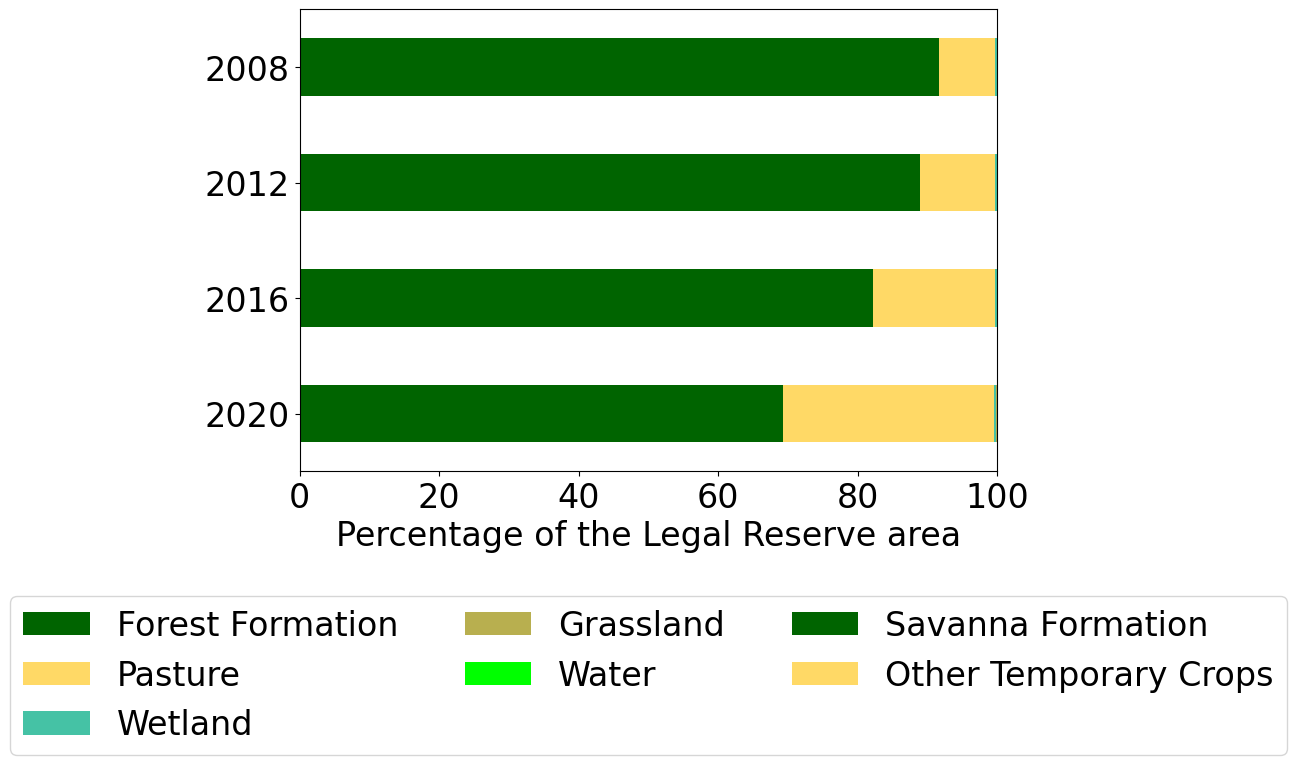

In [ ]:
fig=lulc_rl_year_mean_perc.plot(x = 'ano',    kind = 'barh',    stacked = True,
                                # title = 'Percentual médio das classes de cobertura da terra nas áreas de Reserva Legal',
                                mark_right = True,    figsize=(9,6),    color = code_colors, legend = False )
fig.ticklabel_format(style='plain', useOffset=False, axis='x')
fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
# fig.set_xlabel('Area (km\u00b2)')
fig.set_xlabel('Percentage of the Legal Reserve area')
fig.set_ylabel('')
fig.set_xlim([0,100])
fig.legend(labels=lulc_names, loc='lower center', bbox_to_anchor=(0.5, -0.65),ncol=3)
plt.rcParams.update({'font.size': 24})

fig.figure.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/LULC_RL_perc_media_v2.png', dpi =500,bbox_inches = 'tight')

In [ ]:
recode_rl = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/Tabelas_LULC/RL_RECODE_Labrea.csv')
recode_rl.head()

,Unnamed: 0,1,3,IDF,ano,2,5
0,0,1238.0,463.0,113026,2008,NaN,NaN
1,1,1260.0,441.0,113026,2016,NaN,NaN
2,2,1225.0,476.0,113026,2012,NaN,NaN
3,3,1355.0,346.0,113026,2020,NaN,NaN
4,4,315.0,33.0,113802,2008,NaN,NaN


In [ ]:
recode_rl_fill = recode_rl.fillna(0)
recode_rl_fill.head()

,Unnamed: 0,1,3,IDF,ano,2,5
0,0,1238.0,463.0,113026,2008,0.0,0.0
1,1,1260.0,441.0,113026,2016,0.0,0.0
2,2,1225.0,476.0,113026,2012,0.0,0.0
3,3,1355.0,346.0,113026,2020,0.0,0.0
4,4,315.0,33.0,113802,2008,0.0,0.0


In [ ]:
recode_rl_order = recode_rl_fill[['IDF','ano','1','2','3','5']]
recode_rl_order.head()

,IDF,ano,1,2,3,5
0,113026,2008,1238.0,0.0,463.0,0.0
1,113026,2016,1260.0,0.0,441.0,0.0
2,113026,2012,1225.0,0.0,476.0,0.0
3,113026,2020,1355.0,0.0,346.0,0.0
4,113802,2008,315.0,0.0,33.0,0.0


In [ ]:
recode_rl_values=['1','2','3','5']

In [ ]:
a = 900/10000 #hectares
# a = 900/1000000 #km2

for val in recode_rl_values:
  recode_rl_order[val] = recode_rl_order[val].apply(lambda x: x*a)

recode_rl_order.head() #tabela com a área calculada a partir do número de pixels por classes de cobertura da terra

<ipython-input-109-74d20f8311ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recode_rl_order[val] = recode_rl_order[val].apply(lambda x: x*a)


,IDF,ano,1,2,3,5
0,113026,2008,111.42,0.0,41.67,0.0
1,113026,2016,113.40,0.0,39.69,0.0
2,113026,2012,110.25,0.0,42.84,0.0
3,113026,2020,121.95,0.0,31.14,0.0
4,113802,2008,28.35,0.0,2.97,0.0


In [ ]:
recode_rl_order['vegnat']=recode_rl_order['1']+recode_rl_order['2']
recode_rl_order.head()

,IDF,ano,1,2,3,5,vegnat
0,113026,2008,111.42,0.0,41.67,0.0,111.42
1,113026,2016,113.40,0.0,39.69,0.0,113.40
2,113026,2012,110.25,0.0,42.84,0.0,110.25
3,113026,2020,121.95,0.0,31.14,0.0,121.95
4,113802,2008,28.35,0.0,2.97,0.0,28.35


In [ ]:
recode_rl_values_vn=['1','2','3','5','vegnat']

In [ ]:
recode_rl_order['AREA TOTAL'] = recode_rl_order[recode_rl_values].sum(axis=1)
recode_rl_order

,IDF,ano,1,2,3,5,vegnat,AREA TOTAL
0,113026,2008,111.42,0.0,41.67,0.0,111.42,153.09
1,113026,2016,113.40,0.0,39.69,0.0,113.40,153.09
2,113026,2012,110.25,0.0,42.84,0.0,110.25,153.09
3,113026,2020,121.95,0.0,31.14,0.0,121.95,153.09
4,113802,2008,28.35,0.0,2.97,0.0,28.35,31.32
...,...,...,...,...,...,...,...,...
11435,9573503,2020,52.38,0.0,0.00,0.0,52.38,52.38
11436,9574319,2008,481.32,0.0,10.17,0.0,481.32,491.49
11437,9574319,2016,480.24,0.0,11.25,0.0,480.24,491.49
11438,9574319,2020,76.86,0.0,414.63,0.0,76.86,491.49


In [ ]:
for l in recode_rl_values_vn:
  recode_rl_order[f'perc_{l}']=recode_rl_order[l]/recode_rl_order['AREA TOTAL']*100

In [ ]:
recode_rl_order.head()

,IDF,ano,1,2,3,5,vegnat,AREA TOTAL,perc_1,perc_2,perc_3,perc_5,perc_vegnat
0,113026,2008,111.42,0.0,41.67,0.0,111.42,153.09,72.780717,0.0,27.219283,0.0,72.780717
1,113026,2016,113.40,0.0,39.69,0.0,113.40,153.09,74.074074,0.0,25.925926,0.0,74.074074
2,113026,2012,110.25,0.0,42.84,0.0,110.25,153.09,72.016461,0.0,27.983539,0.0,72.016461
3,113026,2020,121.95,0.0,31.14,0.0,121.95,153.09,79.659024,0.0,20.340976,0.0,79.659024
4,113802,2008,28.35,0.0,2.97,0.0,28.35,31.32,90.517241,0.0,9.482759,0.0,90.517241


In [ ]:
recode_rl_order.columns

Index(['IDF', 'ano', '1', '2', '3', '5', 'vegnat', 'AREA TOTAL', 'perc_1',
       'perc_2', 'perc_3', 'perc_5', 'perc_vegnat'],
      dtype='object')

In [ ]:
recode_rl_area = recode_rl_order [['IDF', 'ano','1', '2', '3', '5']]
recode_rl_area.head()

,IDF,ano,1,2,3,5
0,113026,2008,111.42,0.0,41.67,0.0
1,113026,2016,113.40,0.0,39.69,0.0
2,113026,2012,110.25,0.0,42.84,0.0
3,113026,2020,121.95,0.0,31.14,0.0
4,113802,2008,28.35,0.0,2.97,0.0


In [ ]:
recode_rl_perc = recode_rl_order [['IDF', 'ano','perc_1',
       'perc_2', 'perc_3', 'perc_5']]
recode_rl_perc.head()

,IDF,ano,perc_1,perc_2,perc_3,perc_5
0,113026,2008,72.780717,0.0,27.219283,0.0
1,113026,2016,74.074074,0.0,25.925926,0.0
2,113026,2012,72.016461,0.0,27.983539,0.0
3,113026,2020,79.659024,0.0,20.340976,0.0
4,113802,2008,90.517241,0.0,9.482759,0.0


In [ ]:
recode_rl_vegnat = recode_rl_order[['IDF', 'ano','vegnat','perc_vegnat']]
recode_rl_vegnat.head()

,IDF,ano,vegnat,perc_vegnat
0,113026,2008,111.42,72.780717
1,113026,2016,113.40,74.074074
2,113026,2012,110.25,72.016461
3,113026,2020,121.95,79.659024
4,113802,2008,28.35,90.517241


In [ ]:
mean_year_vegnat_perc = recode_rl_vegnat.groupby('ano')['perc_vegnat'].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
mean_year_vegnat_perc

,ano,perc_vegnat
3,2020,69.607290
2,2016,82.515806
1,2012,89.215361
0,2008,91.852766


In [ ]:
recode_names_perc = ['perc_1',
       'perc_2', 'perc_3', 'perc_5']

In [ ]:
recode_rl_year_mean_perc = recode_rl_perc.groupby('ano')[recode_names_perc].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
recode_rl_year_mean_perc

,ano,perc_1,perc_2,perc_3,perc_5
3,2020,69.282698,0.324593,30.353081,0.039629
2,2016,82.271039,0.244767,17.446479,0.037715
1,2012,88.976697,0.238665,10.746544,0.038095
0,2008,91.624479,0.228287,8.111628,0.035606


In [ ]:
code_colors_2 = ['#129912','#bbfcac','#ffffb2','#ea9999','#0000ff']
# superclasses = ['Floresta','Formação Natural não Florestal','Agropecuária',"Corpo D'água"] #usar aspas duplas para inserir as aspas simples na string
superclasses = ['Forest','Non Forest Natural Formation','Farming','Non Vegetated Area', 'Water']

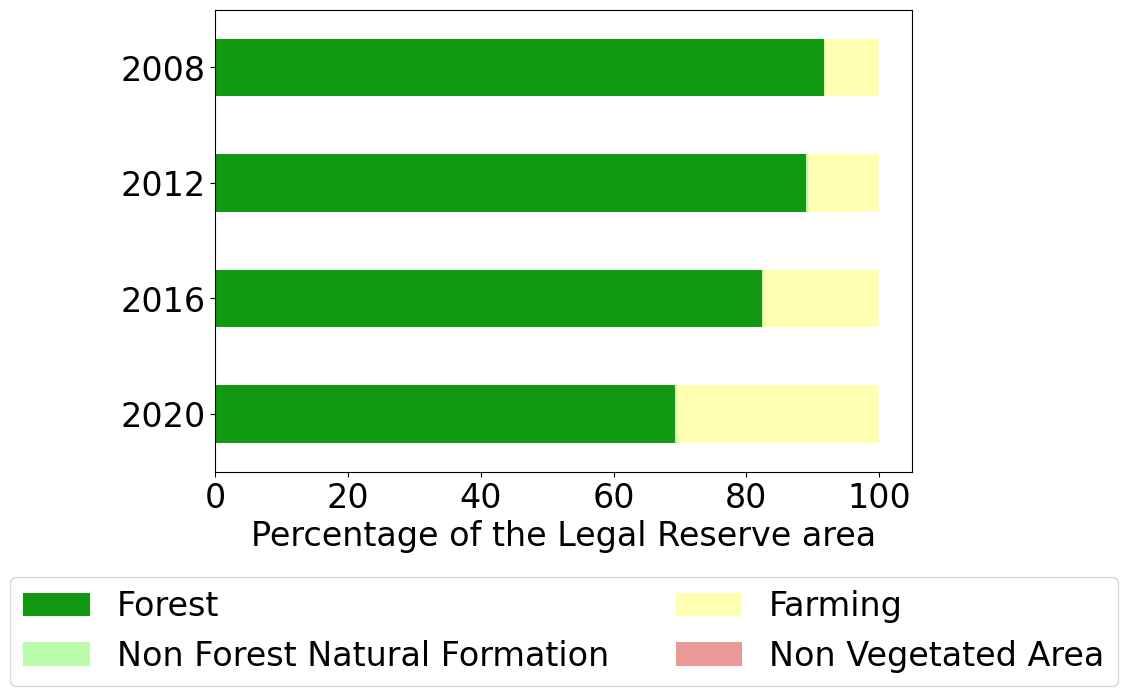

In [ ]:
fig=recode_rl_year_mean_perc.plot(x = 'ano',    kind = 'barh',    stacked = True,
                                  # title = 'Percentual médio das classes de cobertura da terra nas áreas de Reserva Legal',
                                  mark_right = True,    figsize=(9,6),    color = code_colors_2, legend = False )
fig.ticklabel_format(style='plain', useOffset=False, axis='x')
fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
# fig.set_xlabel('Área (km\u00b2)')
fig.set_xlabel('Percentage of the Legal Reserve area')
fig.set_ylabel('')
fig.legend(labels=superclasses, loc='lower center', bbox_to_anchor=(0.5, -0.5),ncol=2)
plt.rcParams.update({'font.size': 24})

fig.figure.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/RECODE_RL_perc_media_v2.png', dpi =500,bbox_inches = 'tight')